# Human Ressources Analytics

**Loading csv files**

In [1]:
HUMRES <- read.csv("data/DATA_2.02_HR.csv")
head(HUMRES)

,S,LPE,NP,ANH,TIC,Newborn
,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,0.38,0.53,2,157,3,0
2,0.80,0.86,5,262,6,0
3,0.11,0.88,7,272,4,0
4,0.72,0.87,5,223,5,0
5,0.37,0.52,2,159,3,0
6,0.41,0.50,2,153,3,0


**Exploring the file**

In [2]:
str(HUMRES)

'data.frame':	2000 obs. of  6 variables:
 $ S      : num  0.38 0.8 0.11 0.72 0.37 0.41 0.1 0.92 0.89 0.42 ...
 $ LPE    : num  0.53 0.86 0.88 0.87 0.52 0.5 0.77 0.85 1 0.53 ...
 $ NP     : int  2 5 7 5 2 2 6 5 5 2 ...
 $ ANH    : int  157 262 272 223 159 153 247 259 224 142 ...
 $ TIC    : int  3 6 4 5 3 3 4 5 5 3 ...
 $ Newborn: int  0 0 0 0 0 0 0 0 0 0 ...


In [3]:
summary(HUMRES)

       S             LPE              NP             ANH             TIC       
 Min.   :0.09   Min.   :0.450   Min.   :2.000   Min.   :126.0   Min.   :2.000  
 1st Qu.:0.11   1st Qu.:0.520   1st Qu.:2.000   1st Qu.:146.0   1st Qu.:3.000  
 Median :0.41   Median :0.790   Median :4.000   Median :225.0   Median :4.000  
 Mean   :0.44   Mean   :0.721   Mean   :3.877   Mean   :207.9   Mean   :3.878  
 3rd Qu.:0.73   3rd Qu.:0.900   3rd Qu.:6.000   3rd Qu.:262.0   3rd Qu.:5.000  
 Max.   :0.92   Max.   :1.000   Max.   :7.000   Max.   :310.0   Max.   :6.000  
    Newborn      
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.0000  
 Mean   :0.0525  
 3rd Qu.:0.0000  
 Max.   :1.0000  

In [4]:
# ggplot libray
library(ggplot2)

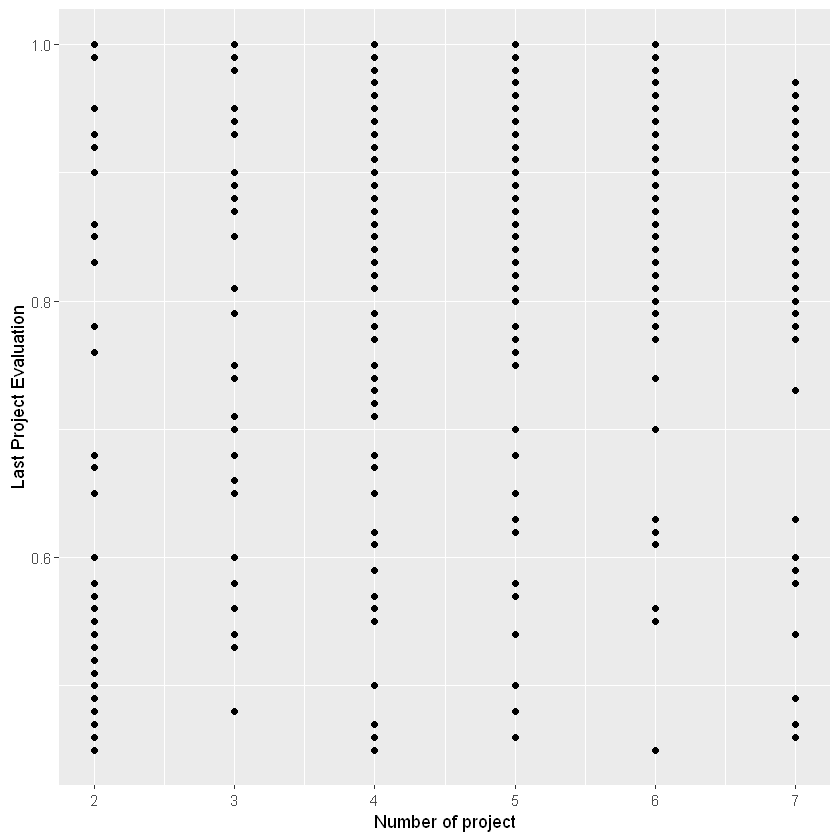

In [5]:
# LPE = Last Project Evaluation
# NP = Number of Prijects

ggplot(data=HUMRES, aes(x=NP,y=LPE)) + 
  geom_point() +
  xlab("Number of project") +
  ylab("Last Project Evaluation")

#### Now, let's normalize our variables

In [6]:
# To keep our dataset safe, let's create a copy of it called "testdata"
testdata = HUMRES

# the scale function automatically performs data normalization on all your variables
testdata = scale(testdata) 

In [7]:
# the dist() function computes the distances of all the observations in our dataset
d = dist(testdata, method = "euclidean")

# hclust() function performs hiearchical clustering, we pass it the distances, and we set the method argument to "ward.D"
hcward = hclust(d, method="ward.D") 

In [8]:
# assign our points to our k=4 clusters
HUMRES$groups = cutree(hcward,k=4) 

In [9]:
# The aggregate() function presents a summary of a statistic, broken down by one or more groups. 
# Here we compute the mean of each variable for each group.
aggdata = aggregate(.~ groups, data=HUMRES, FUN=mean) 

#### One thing we would like to have is the proportion of our data that is in each cluster

In [10]:
# we create a variable called proptemp which computes the number of observations in each group 
# (using the S variable, but you can take any.)
proptemp=aggregate(S~ groups, data=HUMRES, FUN=length)

# proportion of observations in each group we compute the ratio between proptemp and the total number of observations
aggdata$proportion=(proptemp$S)/sum(proptemp$S)

# Let's order the groups from the larger to the smaller
aggdata = aggdata[order(aggdata$proportion,decreasing=T),] 

In [11]:
aggdata

,groups,S,LPE,NP,ANH,TIC,Newborn,proportion
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4082346,0.5106936,2.000000,143.5044,3.000000,0,0.3965
2,2,0.7355272,0.8732588,4.476038,237.7732,4.811502,0,0.3130
3,3,0.1028571,0.8715126,6.237395,276.7353,4.115546,0,0.2380
4,4,0.4455238,0.7195238,3.780952,204.3524,3.866667,1,0.0525


In [12]:
# let's remove the Newborn variable, which is not really relevant and by being a dummy drives the clustering too much...
testdata = HUMRES[,1:5]
head(testdata)

,S,LPE,NP,ANH,TIC
,<dbl>,<dbl>,<int>,<int>,<int>
1,0.38,0.53,2,157,3
2,0.80,0.86,5,262,6
3,0.11,0.88,7,272,4
4,0.72,0.87,5,223,5
5,0.37,0.52,2,159,3
6,0.41,0.50,2,153,3


In [13]:
# We normalize again our original variables
testdata = scale(testdata)

# We compute the distances between observations
d = dist(testdata, method = "euclidean") 

# Hiearchical Clustering using Ward criterion
hcward = hclust(d, method="ward.D") 

In [14]:
# Create segments for k=4
HUMRES$groups = cutree(hcward,k=4) 

Note that we re-use the original dataset "HUMRES" (where the variable Newborn is still present) and not "testdata" (where the variable Newborn has been removed). Hence we'll be able to produce summary statistics also for the Newborn variable regardless it wasn't included when doing the second version of the clustering

In [15]:
# Aggregate the values again
aggdata = aggregate(.~ groups, data=HUMRES, FUN=mean)

In [16]:
# Compute the number of observations per group
proptemp=aggregate(S~ groups, data=HUMRES, FUN=length)  

# Compute the proportion
aggdata$proportion=(proptemp$S)/sum(proptemp$S) 

# Let's order the groups from the larger to the smaller
aggdata=aggdata[order(aggdata$proportion,decreasing=T),] 

In [17]:
aggdata

,groups,S,LPE,NP,ANH,TIC,Newborn,proportion
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.4083871,0.5105615,2.000000,143.5735,3.000000,0.05256870,0.4185
3,3,0.1033399,0.8718182,6.201581,276.3004,4.100791,0.04743083,0.2530
2,2,0.8184082,0.9225306,4.604082,247.3918,5.206122,0.05102041,0.2450
4,4,0.5076647,0.7276048,4.107784,207.3473,3.706587,0.07185629,0.0835


#### Writing csv files

In [18]:
write.csv(aggdata, "data/Report_aggdata.csv")

**Question:** If you cluster the HR dataset (DATA_2.02_HR.csv) on Satisfaction, Project Evaluation and Number of Projects Done and that you keep 2 segments using the same values for the other specifications (scaling, distance type and clustering algorithm), what’s the resulting median Satisfaction per segment?

In [19]:
HUMRES$groups <- cutree(hcward,k=2)      # k=2 clusters

aggdata = aggregate(.~ groups, data=HUMRES, FUN=mean)

proptemp=aggregate(S~ groups, data=HUMRES, FUN=length)  

aggdata$proportion=(proptemp$S)/sum(proptemp$S) 

aggdata=aggdata[order(aggdata$proportion,decreasing=T),]

aggdata

,groups,S,LPE,NP,ANH,TIC,Newborn,proportion
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,2,0.4626741,0.8724764,5.227859,254.2193,4.509888,0.05245056,0.5815
1,1,0.4083871,0.5105615,2.000000,143.5735,3.000000,0.05256870,0.4185
